# 4 Advanced Modeling - Deep Learning Models and Specialized Packages

In this notebook we will use more advanced models on our two wells to see if we can further improve the MAPE scores compared to our base models. We will be using algorithnms, packages and framemworks such as pmdraima,KATS,GREYkite, LSTM, Tensorflow,etc. 

## TABLE OF CONTENTS:
* [4.1 Import Relevant Package](#1)


 <b>4.1 Import Relevant Package <b/> <a class="anchor" id="1"></a>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import auto_arima
from kats.consts import TimeSeriesData
from kats.models.sarima import SARIMAModel, SARIMAParams

 <b>4.2 Import CSV <b/> <a class="anchor" id="2"></a>

In [66]:
df = pd.read_csv('Monthly.csv')

 <b>4.3 Examine Data <b/>  <a class="anchor" id="3"></a>

Drop index and level_0 columns

In [67]:
df.drop(columns=['index','level_0'], inplace=True)

Call head of data.

In [68]:
df.head(2)

,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,...,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
0,2014-07-01,215.305839,108.150677,166.458710,0.0,47.269826,48.847129,56.742968,20.381968,15084.0,...,211.228320,0.0,22.489461,47.242292,27.762750,34.311375,631.0,0.0,0.0,0.0
1,2014-08-01,230.622097,105.879581,188.180742,0.0,29.241656,42.441258,41.679613,24.964645,6968.0,...,156.003875,0.0,46.411330,67.842750,55.589875,39.336469,21293.0,0.0,863.0,0.0


Make 'DATEPRD' as index

In [69]:
df.set_index('DATEPRD',inplace=True)

Call head of data.

In [70]:
df.head(2)

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,...,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
DATEPRD,,,,,,,,,,,,,,,,,,,,,
2014-07-01,215.305839,108.150677,166.458710,0.0,47.269826,48.847129,56.742968,20.381968,15084.0,0.0,...,211.228320,0.0,22.489461,47.242292,27.762750,34.311375,631.0,0.0,0.0,0.0
2014-08-01,230.622097,105.879581,188.180742,0.0,29.241656,42.441258,41.679613,24.964645,6968.0,0.0,...,156.003875,0.0,46.411330,67.842750,55.589875,39.336469,21293.0,0.0,863.0,0.0


Convert index to datetime

In [71]:
df.index = pd.to_datetime(df.index)

Call shape of dataframe

In [72]:
df.shape

(285, 25)

Call column names

In [73]:
df.columns

Index(['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'NPD_WELL_BORE_NAME', 'AVG_DOWNHOLE_PRESSURE.shifted3',
       'AVG_DOWNHOLE_TEMPERATURE.shifted3', 'AVG_DP_TUBING.shifted3',
       'AVG_ANNULUS_PRESS.shifted3', 'AVG_CHOKE_SIZE_P.shifted3',
       'AVG_WHP_P.shifted3', 'AVG_WHT_P.shifted3', 'DP_CHOKE_SIZE.shifted3',
       'BORE_OIL_VOL.shifted3', 'BORE_GAS_VOL.shifted3',
       'BORE_WAT_VOL.shifted3', 'BORE_WI_VOL.shifted3'],
      dtype='object')

Create a list of all columns to remove

In [74]:
list_to_remove = ['AVG_DOWNHOLE_PRESSURE.shifted3',
 'AVG_DOWNHOLE_TEMPERATURE.shifted3',
 'AVG_DP_TUBING.shifted3',
 'AVG_ANNULUS_PRESS.shifted3',
 'AVG_CHOKE_SIZE_P.shifted3',
 'AVG_WHP_P.shifted3',
 'AVG_WHT_P.shifted3',
 'DP_CHOKE_SIZE.shifted3',
 'BORE_OIL_VOL.shifted3',
 'BORE_GAS_VOL.shifted3',
 'BORE_WAT_VOL.shifted3',
 'BORE_WI_VOL.shifted3','BORE_WI_VOL']

Drop all unwanted columns.

In [75]:
df.drop(columns=list_to_remove,inplace=True)

Call head of dataframe.

In [76]:
df.head(2)

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,NPD_WELL_BORE_NAME
DATEPRD,,,,,,,,,,,,
2014-07-01,215.305839,108.150677,166.458710,0.0,47.269826,48.847129,56.742968,20.381968,15084.0,0.0,6244.0,15/9-F-1 C
2014-08-01,230.622097,105.879581,188.180742,0.0,29.241656,42.441258,41.679613,24.964645,6968.0,0.0,4530.0,15/9-F-1 C


Call tail of dataframe

In [77]:
df.tail()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,NPD_WELL_BORE_NAME
DATEPRD,,,,,,,,,,,,
2016-03-01,218.160839,105.842548,184.348968,16.219032,12.305040,33.811903,37.630516,17.960387,3746.0,0.0,5035.0,15/9-F-15 D
2016-04-01,232.322097,105.748387,197.699839,16.777710,19.452198,34.622387,36.326290,11.161452,4632.0,29.0,5787.0,15/9-F-15 D
2016-05-02,209.074633,106.246333,184.315067,18.663567,15.825980,24.759633,42.437867,8.121633,4609.0,0.0,5907.0,15/9-F-15 D
2016-06-01,212.926967,105.923067,184.994100,16.132400,23.024772,27.932900,40.764933,14.086767,3466.0,0.0,5390.0,15/9-F-15 D
2016-07-01,308.101258,92.706710,299.597355,4.271226,7.057121,8.503903,12.570806,9.004000,828.0,0.0,1173.0,15/9-F-15 D


 <b>4.4 Preprocessing and training for well with a typical decline curve profile<b/> <a class="anchor" id="4"></a>

Create dataframe df1 for F-14 well.

In [78]:
df1 = df[df['NPD_WELL_BORE_NAME'] =='15/9-F-14'].copy()

Plot oil production rate

<AxesSubplot:title={'center':'15/9-F-14'}, xlabel='DATEPRD', ylabel='BORE_OIL_VOL'>

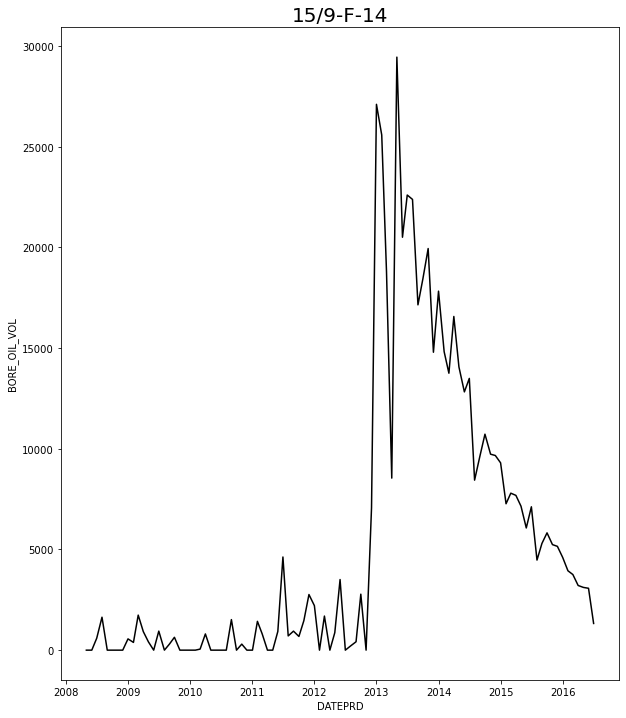

In [79]:
fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('15/9-F-14',size=20)
sns.lineplot(x='DATEPRD', y='BORE_OIL_VOL', data=df1, ax=ax, color='black')

Remove irrelevant data

In [80]:
df1= df1[df1.index >= '2013-02-01'].copy()

Plot oil production rate

<AxesSubplot:title={'center':'15/9-F-14'}, xlabel='DATEPRD', ylabel='BORE_OIL_VOL'>

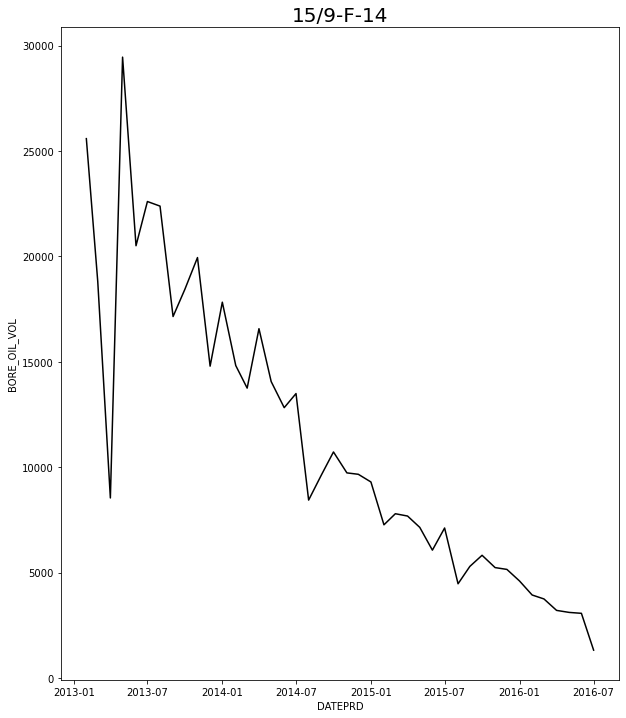

In [81]:
fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('15/9-F-14',size=20)
sns.lineplot(x='DATEPRD', y='BORE_OIL_VOL', data=df1, ax=ax, color='black')

Examine dataframe shape.

In [82]:
df1.shape

(42, 12)

Call dataframe head.

In [83]:
df1.head()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,NPD_WELL_BORE_NAME
DATEPRD,,,,,,,,,,,,
2013-02-01,242.421357,101.094214,209.964714,22.047036,96.248736,32.456643,87.408179,3.390214,25589.0,0.0,0.0,15/9-F-14
2013-03-01,245.233805,100.381593,208.418654,19.721192,61.694085,36.922413,81.552552,9.453654,18818.0,0.0,348.0,15/9-F-14
2013-04-01,244.286854,100.123739,206.884745,19.660531,60.121212,37.550047,82.163571,10.099634,8545.0,0.0,393.0,15/9-F-14
2013-05-01,238.948909,98.773576,206.431758,22.316697,97.851758,32.517212,87.785394,3.544788,29455.0,0.0,0.0,15/9-F-14
2013-06-03,244.634654,100.388664,211.459578,20.471499,84.795673,33.254221,87.335324,4.528697,20509.0,0.0,385.0,15/9-F-14


Call dataframe tail

In [84]:
df1.tail()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,NPD_WELL_BORE_NAME
DATEPRD,,,,,,,,,,,,
2016-03-01,267.556452,99.625387,239.260194,21.033677,98.741093,28.296194,88.031548,1.885323,3755.0,0.0,0.0,15/9-F-14
2016-04-01,268.224484,99.595581,239.024968,22.144323,82.407986,29.199452,87.575323,3.200581,3212.0,0.0,0.0,15/9-F-14
2016-05-02,270.783200,99.774267,239.266900,22.530533,42.842672,31.516300,87.679733,5.695933,3116.0,0.0,0.0,15/9-F-14
2016-06-01,269.827700,100.053033,238.942100,23.435200,47.767466,30.885567,88.542800,5.303067,3073.0,0.0,0.0,15/9-F-14
2016-07-01,286.916323,98.268194,259.612484,12.011452,29.669248,27.303903,41.712613,7.113097,1326.0,0.0,0.0,15/9-F-14


 <b>4.4.1 Auto-ARIMA<b/> <a class="anchor" id="4"></a>

Create oil production rate time series

In [85]:
df1_Oil = df1['BORE_OIL_VOL']

Call time series tail

In [86]:
df1_Oil.tail()

DATEPRD
2016-03-01    3755.0
2016-04-01    3212.0
2016-05-02    3116.0
2016-06-01    3073.0
2016-07-01    1326.0
Name: BORE_OIL_VOL, dtype: float64

Split time series between Training and Testing

In [87]:
Train=df1_Oil.loc[:'2016-03-01']

In [88]:
Test=df1_Oil.loc['2016-04-01':]

In [89]:
Test

DATEPRD
2016-04-01    3212.0
2016-05-02    3116.0
2016-06-01    3073.0
2016-07-01    1326.0
Name: BORE_OIL_VOL, dtype: float64

Plot train set.

<AxesSubplot:xlabel='DATEPRD'>

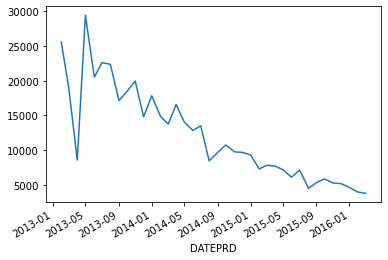

In [90]:
Train.plot() 

Plot test set.

<AxesSubplot:xlabel='DATEPRD'>

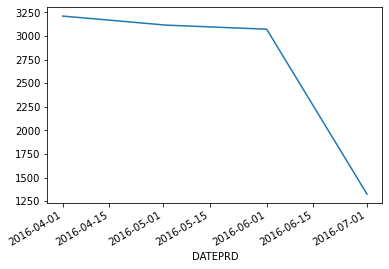

In [91]:
Test.plot()

Create auto arima object. This model will auto-select the best model given our p , q , d space  and select the model with the lowest AIC score.

In [92]:
arima_model = auto_arima(Train, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=4, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None)

Print summary of auto-ARIMA model

In [93]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   38
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -342.110
Date:                Fri, 04 Mar 2022   AIC                            692.221
Time:                        17:47:39   BIC                            698.665
Sample:                             0   HQIC                           694.493
                                 - 38                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5715      0.080     -7.167      0.000      -0.728      -0.415
ar.L2         -0.2264      0.078     -2.921      0.003      -0.378      -0.074
ar.L3          0.3224      0.054      5.973      0.000       0.217       0.428
sigma2      6.381e+06    6.1e-09   1.05e+15      0.000    6.38e+06    6.38e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 5.76
Prob(Q):                              0.42   Prob(JB):                         0.06
Heteroskedasticity (H):               0.05   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.03e+31. Standard errors may be unstable.
"""

The best Auto-ARIMA model does not have the same p,d,q as the auto-ARIMA model.

Create Summary dataframe

In [94]:
Summary =pd.DataFrame(Test)

In [95]:
Summary

,BORE_OIL_VOL
DATEPRD,
2016-04-01,3212.0
2016-05-02,3116.0
2016-06-01,3073.0
2016-07-01,1326.0


Add auto-ARIMA predictions for the next 4 months to the Summary dataframe.

In [96]:
Summary['Auto-ARIMA'] =pd.DataFrame(arima_model.predict(n_periods=4),index=Test.index)

In [98]:
arima_model.predict(n_periods=4)

array([3835.42240351, 3617.39639123, 3663.510225  , 3712.43977022])

In [97]:
Summary

,BORE_OIL_VOL,Auto-ARIMA
DATEPRD,,
2016-04-01,3212.0,3835.422404
2016-05-02,3116.0,3617.396391
2016-06-01,3073.0,3663.510225
2016-07-01,1326.0,3712.439770


Call summary dataframe

In [293]:
Summary

,BORE_OIL_VOL,Auto-ARIMA
DATEPRD,,
2016-04-01,3212.0,3835.422404
2016-05-02,3116.0,3617.396391
2016-06-01,3073.0,3663.510225
2016-07-01,1326.0,3712.439770


 <b>4.4.2 KATS<b/> <a class="anchor" id="4"></a>

KATS which stands for Kits to Analyze Time Series is a light-weight,easy-to-use,extenable, and generalizable framework to perform time series analysis in Python. It supports forecasting, detection, feature extractionand useful utilites such as time series simulators. KATS supports the following 10 forecasting models Linear, Quadratic, ARIMA, SARIMA, Holt-Winters, Prophet, AR-Net, LSTM, Theta and VAR. 

 <b>4.4.2.1 KATS - ARIMA<b/> <a class="anchor" id="4"></a>

KATS has an ARIMA implementation and we will use this as our first model.

Call shape of dataframe

In [294]:
df1.shape

(42, 12)

Create training set by removing last 4 months of data

In [295]:
df1_train = df1.loc[:'2016-03-01'].copy()

Call shape of dataframe

In [296]:
df1_train.shape

(38, 12)

Call head of dataframe

In [297]:
df1_train.head()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,NPD_WELL_BORE_NAME
DATEPRD,,,,,,,,,,,,
2013-02-01,242.421357,101.094214,209.964714,22.047036,96.248736,32.456643,87.408179,3.390214,25589.0,0.0,0.0,15/9-F-14
2013-03-01,245.233805,100.381593,208.418654,19.721192,61.694085,36.922413,81.552552,9.453654,18818.0,0.0,348.0,15/9-F-14
2013-04-01,244.286854,100.123739,206.884745,19.660531,60.121212,37.550047,82.163571,10.099634,8545.0,0.0,393.0,15/9-F-14
2013-05-01,238.948909,98.773576,206.431758,22.316697,97.851758,32.517212,87.785394,3.544788,29455.0,0.0,0.0,15/9-F-14
2013-06-03,244.634654,100.388664,211.459578,20.471499,84.795673,33.254221,87.335324,4.528697,20509.0,0.0,385.0,15/9-F-14


Drop 'NPD_WELL_BORE_NAME' column.

In [298]:
df1_train.drop(columns=['NPD_WELL_BORE_NAME'],inplace=True)

Create TimeSeriesData object by assigning index as time value and oil production rate as value. 

In [299]:
DF1 =TimeSeriesData(time=df1_train.index,value=df1_train['BORE_OIL_VOL'])

Create SARIMA param class

params = SARIMAParams(
    p = 3, 
    d=1, 
    q=0, 
    )

Initiate SARIMA model

In [300]:
m = SARIMAModel(data=DF1, params=params)

Fit SARIMA model

In [301]:
m.fit()

Generate Forecast values

In [302]:
fcst = m.predict(
    steps=4, 
    freq="MS"
    )

In [303]:
fcst

,time,fcst,fcst_lower,fcst_upper
38,2016-04-01,3835.422404,-1115.526316,8786.371123
39,2016-05-01,3617.396391,-1768.876322,9003.669104
40,2016-06-01,3663.510225,-2325.188858,9652.209308
41,2016-07-01,3712.439770,-3821.254685,11246.134225


Save Forecast values to Summary dataframe

In [304]:
Summary['KATS-ARIMAX'] =fcst['fcst']

In [307]:
fcst

,time,fcst,fcst_lower,fcst_upper
38,2016-04-01,3835.422404,-1115.526316,8786.371123
39,2016-05-01,3617.396391,-1768.876322,9003.669104
40,2016-06-01,3663.510225,-2325.188858,9652.209308
41,2016-07-01,3712.439770,-3821.254685,11246.134225


Print Summary dataframe

In [306]:
Summary

,BORE_OIL_VOL,Auto-ARIMA,KATS-ARIMAX
DATEPRD,,,
2016-04-01,3212.0,3835.422404,NaN
2016-05-02,3116.0,3617.396391,NaN
2016-06-01,3073.0,3663.510225,NaN
2016-07-01,1326.0,3712.439770,NaN


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


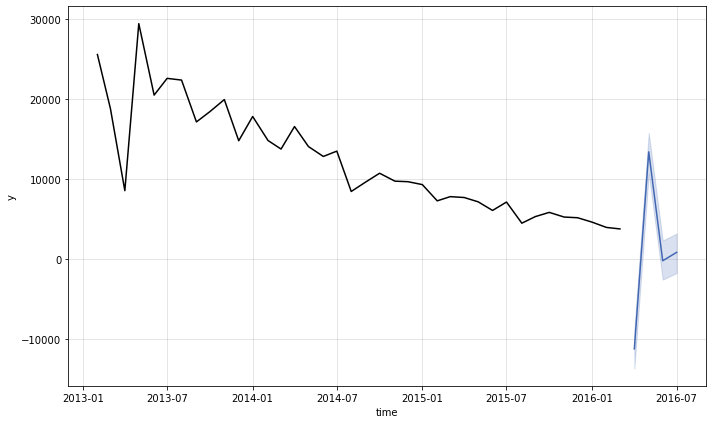

In [470]:
# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams() # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(DF1, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=4, freq="MS")

# plot to visualize
m.plot()

In [471]:
DF1 =TimeSeriesData(df1)

In [478]:

# Use VAR model to forecast this multivariate time series
from kats.models.var import VARModel, VARParams

params = VARParams()
m = VARModel(DF1, params)
m.fit()
fcst = m.predict(steps = 4)

m.plot()
plt.show()

AttributeError: 'VARResults' object has no attribute 'y'